                      Нижегородский государственный университет имени Н. И. Лобачевского
 
                                          Радиофизический факультет

                                            Кафедра математики
                                            

  ## Отчет по лабораторной работе №7 "Задача Коши"
                                              
                                              Вариант 9
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                                                  Выполнила: Емельянова Анастасия, 430 гр.
                                                                                  Проверил: Шиндин А. В.

                                          Нижний Новгород, 2016 год.
                                    

### Содержание
1. Постановка задачи.
2. Описание используемых алгоритмов.
3. Исходный код программы. Результаты работы программы.
4. Анализ результатов.

**1. Постановка задачи.**

0) Взять из билета своего варианта дифференциальное уравнение, метод решения, начальные условия, диапазон изменения аргумента, а также относительную точность.

Решить **неявным методом Адамса при k=1** задачу Коши

$$5y''+8y'+4y=xe^{-x}$$
$$y(0)=1; y'(0)=0; x\in [0,2]$$
с *заданной относительной точностью* $\epsilon=0.01$ 

1) Решить заданным методом дифференциальное уравнение из пункта 0. (+3 балла)

2) Обеспечить работу программы с системой дифференциальных уравнений первого порядка ***в режиме «черного ящика» (black box)***. (+3 балла)

3) Найти ***точное решение***, сравнить найденное решение с точным. (+3 балла)

4) Найти решение с помощью ***метода Рунге-Кутты кратности 4-5***. (+3 балла) 

Результаты решения представить в виде ***фазовых траекторий***.


**2. Описание используемых алгоритмов.**

При численном решении задачи Коши 

$$y'(x)=f(x,y(x)), x\in (a,b),$$
$$y(a)=y^0$$
ищется последовательность векторов $(y_n)_{n=0}^N$, являющихся приближениями для значений решения $(y(x_n))_{n=0}^N$ на множестве точек сетки $\omega_N=(x_i: x_{i+1}=x_i+h_i, i=0,...,N-1; x_0=a, x_N=b),$ $h_i=const>0$ - шаг сетки (равномерной).

Если правая часть ДУ непрерывна по сококупности переменных в $(a,b)*R^s$ и выполнено условие Липшица по $y$, то решение задачи Коши существует и единственно при любом начальном векторе $y^0$.

Идея *многошаговых методов* состоит в том, чтобы явно использовать ранее вычисленные значения $y_n, y_{n-1}, ...$. Задачу Коши при этом приводят к интегральному уравнению, а функцию $F(x)=f(x,y(x))$ заменяют интерполяционным многочленом, принимающим значения $F_n=f(x_n,y_n)$ на множестве точек сетки $x_n$, в которых должны были вычислены приближенные значения $y_n$. Интерполяционный многочлен можно записать в форме Лагранжа. $k$ начальных значений $y_0,...y_{k-1}$ получают каким-либо одношаговым методом, например, *четырехкратным методом Рунге-Кутты*.

**Формула для неявного метода Адамса при k=1**:

$$y_{n+1}=y_n+\frac h {12} (5f(x_{n+1},y_{n+1})+8f(x_n,y_n)-f(x_{n-1},y_{n-1}))$$

*Четырехкратный метод Рунге-Кутты*:

$$y_{n+1}=y_n+\frac h 6 (k_1+2k_2+2k_3+k_4),$$
$$y_0=y^0, n=0,...,N-1; x_n \in \omega_n$$
При этом
$$k_1=f(x_n,y_n)$$
$$k_2=f(x_n+\frac h 2, y_n+\frac {hk_1} 2)$$
$$k_3=f(x_n+\frac h 2, y_n+\frac {hk_2} 2)$$
$$k_4=f(x_n+h, y_n+hk_3)$$

**3. Исходный код программы. Результаты работы программы.**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

Взять число точек на графике:  2000
Порядок дифференциального уравнения:  2
Число итераций для достижения заданной точности:  7
Решение:  [ 1.          0.9999996   0.9999984  ...,  0.47429105  0.47402667
  0.47376238]
Производная:  [ 0.         -0.00079926 -0.00159704 ..., -0.26637351 -0.26627561
 -0.2661777 ]


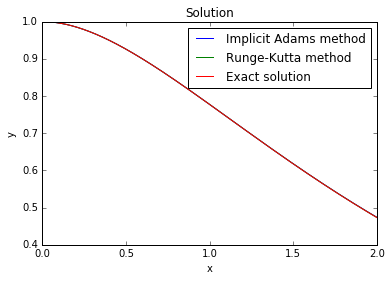

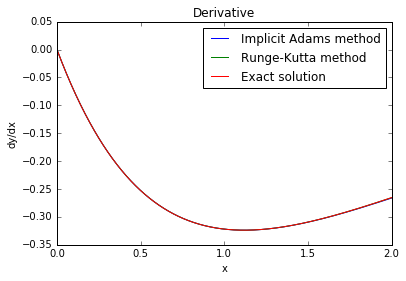

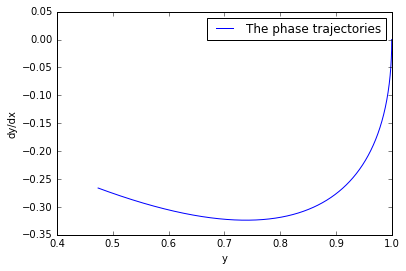

<function matplotlib.pyplot.show>

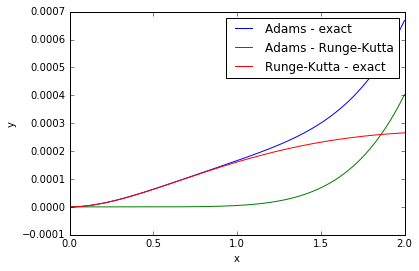

In [2]:
def f(x,y):
    return [y[1], 1/5*(x*math.exp(-x)-4*y[0]-8*y[1])]
def F(f,y0,a,b,e):
    h=0.001
    kq=(b-a)/h
    kq=math.trunc(kq)
    print('Взять число точек на графике: ',kq)
    n=len(y0)
    print('Порядок дифференциального уравнения: ', n)
    x=[a+h*l for l in range (0,kq)]
    y=np.zeros((n,kq))
    for i in range (0,n):
        y[i,0]=y0[i]
    
    #находим y1 4-хкратным методом Рунге-Кутты
    k1=np.zeros(n)
    k2=np.zeros(n)
    k3=np.zeros(n)
    k4=np.zeros(n)
    
    k1=f(a,[y[i,0] for i in range(0,n)])
    k2=f(a+h/2,[y[i,0]+h/2*k1[i] for i in range(0,n)])
    k3=f(a+h/2,[y[i,0]+h/2*k2[i] for i in range (0,n)])
    k4=f(a+h,[y[i,0]+h*k3[i] for i in range (0,n)])
    for i in range (0,n):
        y[i,1]=y[i,0]+h/6*(k1[i]+2*k2[i]+2*k3[i]+k4[i])
    
    #неявный метод Адамса при k=1 
    yst=90*np.ones((n,kq))
    ynov=np.ones((n,kq))
    for i in range (0,n):
        yst[i,0]=y0[i]
        ynov[i,0]=y0[i]
        yst[i,1]=y[i,1]
        ynov[i,1]=y[i,1]
        
    it=0
    while math.fabs((ynov[0,-1]-yst[0,-1])/(ynov[0,-1]))>e:
        it+=1
        for j in range(2,kq):
            for i in range (0,n):
                yst[i,j]=ynov[i,j]
            for i in range (0,n):
                ynov[i,j]=ynov[i,j-1]+h/12*(5*f(x[j],ynov[:,j])[i]+8*f(x[j-1],ynov[:,j-1])[i]-f(x[j-2],ynov[:,j-2])[i])
    print('Число итераций для достижения заданной точности: ', it)
    print('Решение: ', ynov[0,:])
    print('Производная: ', ynov[1,:])
    return ynov[0,:],ynov[1,:]

#точное решение
def tochnoresh(x):
    return 1/2*math.exp(-x)*(2*x+math.exp(x/5)*math.sin(2*x/5)-2*math.exp(x/5)*math.cos(2*x/5)+4)
def proizvodnaya(x):
    return math.exp(-x)*(-x+math.exp(x/5)*math.cos(2*x/5)-1)

#Метод Рунге-Кутты 4-кратный
def runge_kutt(f,y0,a,b,e):
    h=0.001
    kq=(b-a)/h
    kq=math.trunc(kq)
    n=len(y0)
    x=[a+h*l for l in range (0,kq)]
    yrk=np.zeros((n,kq))
    k11=np.zeros(n); k22=np.zeros(n); k33=np.zeros(n); k44=np.zeros(n)
    for i in range (0,n):  
        yrk[i,0]=y0[i]
    for j in range (1,kq):
        k11=np.zeros(n); k22=np.zeros(n); k33=np.zeros(n); k44=np.zeros(n)
        k11=f(x[j-1],[yrk[i,j-1] for i in range(0,n)])
        k22=f(x[j-1]+h/2,[yrk[i,j-1]+h/2*k11[i] for i in range(0,n)])
        k33=f(x[j-1]+h/2,[yrk[i,j-1]+h/2*k22[i] for i in range (0,n)])
        k44=f(x[j-1]+h,[yrk[i,j-1]+h*k33[i] for i in range (0,n)])
        for i in range (0,n):
            yrk[i,j]=yrk[i,j-1]+h/6*(k11[i]+2*k22[i]+2*k33[i]+k44[i])
    return yrk[0,:], yrk[1,:]

#графики
xg = np.linspace(0,2,2000)
yg = [tochnoresh(l) for l in xg]
pryg=[proizvodnaya(l) for l in xg]
yrkg,pryrkg=runge_kutt(f,[1,0],0,2,0.01)
yfazpl,pryfazpl=F(f,[1,0],0,2,0.01)
plt.plot(xg,yfazpl,label = 'Implicit Adams method')
plt.plot(xg,yrkg,label='Runge-Kutta method')
plt.plot(xg,yg,label = 'Exact solution')
plt.title('Solution')
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
plt.show()
plt.plot(xg,pryfazpl,label='Implicit Adams method')
plt.plot(xg,pryrkg,label='Runge-Kutta method')
plt.plot(xg,pryg,label='Exact solution')
plt.title('Derivative')
plt.legend()
plt.ylabel('dy/dx')
plt.xlabel('x')
plt.show()
plt.plot(yfazpl,pryfazpl, label='The phase trajectories')
plt.legend()
plt.ylabel('dy/dx')
plt.xlabel('y')
plt.show()
plt.plot(xg,yfazpl-yg,label='Adams - exact')
plt.plot(xg,yfazpl-yrkg,label='Adams - Runge-Kutta')
plt.plot(xg,yrkg-yg,label='Runge-Kutta - exact')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show

**4. Анализ результатов.**

Число итераций для достижения заданной точности:  $7$

Решение:  $$[ 1.,    0.9999996,    0.9999984,   ...,  0.47429105,   0.47402667,  0.47376238]$$

Производная:  $$[ 0.,   -0.00079926, -0.00159704, ..., -0.26637351, -0.26627561, -0.2661777 ]$$
 
Неявный метод Адамса и 4-кратный метод Рунге-Кутта совпадают с точным решением задачи Коши с точностью до 4 знака после запятой, причем метод Рунге-Кутта оказался в этой задаче точнее. 